In [598]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np
from enum import Enum

In [599]:
# reading data
#db available at https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
db_filename = 'adult.data'

# to ensure that we don't hardcode the filter values.
class FilterValuesEnum(Enum):
    NotApplicableValue="?"
    LessThanFiftySalaryString="<=50K"
    MoreThanFiftySalaryString=">50K"
    ColumnSeperatorValue=","

#to ensure we don't make any mistakes while using column names
# More info about column names in https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
class ColumnNames(Enum):
    Age='Age'
    WorkClass='WorkClass'
    FinalWeight='Final Weight'
    Education='Education'
    EducationNum='Education-Num'
    MaritalStatus='Marital-Status'
    Occupation='Occupation'
    Relationship='Relationship'
    Race='Race'
    Sex='Sex'
    CapitalGain='Capital-Gain'
    CapitalLoss='Capital-Loss'
    HoursPerWeek='Hours Per Week'
    CountryOfOrigin='Country of Origin'
    SalaryFigure='Salary Figure'
    SalaryMoreThanFifty='Is Salary More than Fifty Thousand'
    SalaryLessThanFifty='Is Salary Less than Fifty Thousand'

column_Names = [columnName.value for columnName in ColumnNames]
missing_values = [FilterValuesEnum.NotApplicableValue.value]
actualDataFrame = pd.read_csv(db_filename, sep=FilterValuesEnum.ColumnSeperatorValue.value, names=column_Names, na_values=missing_values, skipinitialspace = True)
actualDataFrame[ColumnNames.SalaryLessThanFifty.value] = actualDataFrame[ColumnNames.SalaryFigure.value] == FilterValuesEnum.LessThanFiftySalaryString.value
actualDataFrame[ColumnNames.SalaryMoreThanFifty.value] = actualDataFrame[ColumnNames.SalaryFigure.value] == FilterValuesEnum.MoreThanFiftySalaryString.value
numberOfRows = len(actualDataFrame)
print(actualDataFrame.loc[13])

Age                                              32
WorkClass                                   Private
Final Weight                                 205019
Education                                Assoc-acdm
Education-Num                                    12
Marital-Status                        Never-married
Occupation                                    Sales
Relationship                          Not-in-family
Race                                          Black
Sex                                            Male
Capital-Gain                                      0
Capital-Loss                                      0
Hours Per Week                                   50
Country of Origin                     United-States
Salary Figure                                 <=50K
Is Salary More than Fifty Thousand            False
Is Salary Less than Fifty Thousand             True
Name: 13, dtype: object


In [600]:
# Inferring which columns have ?, NAN values
print(actualDataFrame.loc[14])
# print(actualDataFrame['Salary Figure'][0])
# print(type(actualDataFrame['Salary Figure'][0]))
# print(actualDataFrame['Salary Figure'] == ' <=50K')
#print('?' in actualDataFrame.loc[27]['WorkClass'])
#print(actualDataFrame['WorkClass'].str[1].contains(' \?'))
#questionValue = actualDataFrame['WorkClass']
#print((actualDataFrame['WorkClass'] != ' ?'))
#print(len(list(filter(lambda x: x == False, questionValue))))
#.str.contains('?')
#print(questionValue)
#print(questionValue.str[0])
# questionFrame = actualDataFrame['WorkClass'].str.replace(" ","").str.contains('?')
# trueList = list(filter(lambda x: x == True, questionFrame))
#print(len(trueList))
#print(actualDataFrame.loc[[2,3]])
#print(actualDataFrame.tail())
#print(actualDataFrame.head())
# print(actualDataFrame.loc[[0]])
# print(actualDataFrame.loc[0][2])
# print(type(actualDataFrame['WorkClass'][0]))
# print(actualDataFrame['WorkClass'])
#print(actualDataFrame.loc[actualDataFrame['WorkClass']])
# slt = actualDataFrame['WorkClass'].str == '?'
# print(slt)
#print(actualDataFrame['WorkClass'].isnull())
# for indexValue, individualColumn in enumerate(column_Names):
#     print("index value: + {1} + {0}".format(type(actualDataFrame.loc[0][individualColumn]), str(indexValue)))
#     #print(individualColumn)
    #print(actualDataFrame[individualColumn])
    #print(actualDataFrame.loc[actualDataFrame[individualColumn] == '?'])
#    print(type(actualDataFrame[[0]])
#     doesUnknowValuesExistForThisColumn = (actualDataFrame.loc[actualDataFrame[individualColumn].str.contains(pat = '*?*', regex = True)]).empty
#     if not doesUnknowValuesExistForThisColumn:
#         print('{0} has empty values'.format(individualColumn))

Age                                                   40
WorkClass                                        Private
Final Weight                                      121772
Education                                      Assoc-voc
Education-Num                                         11
Marital-Status                        Married-civ-spouse
Occupation                                  Craft-repair
Relationship                                     Husband
Race                                  Asian-Pac-Islander
Sex                                                 Male
Capital-Gain                                           0
Capital-Loss                                           0
Hours Per Week                                        40
Country of Origin                                    NaN
Salary Figure                                       >50K
Is Salary More than Fifty Thousand                  True
Is Salary Less than Fifty Thousand                 False
Name: 14, dtype: object


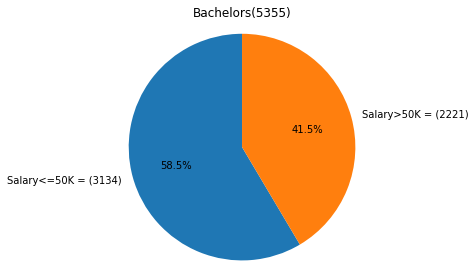

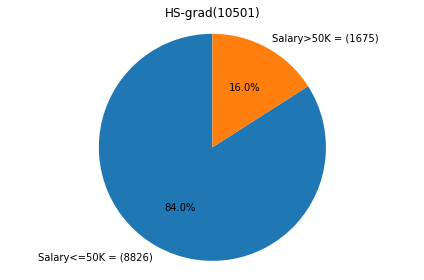

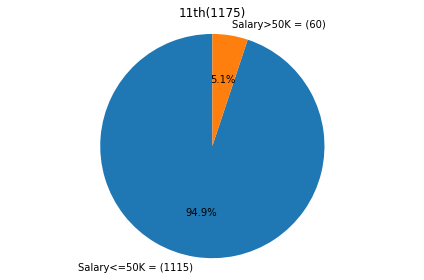

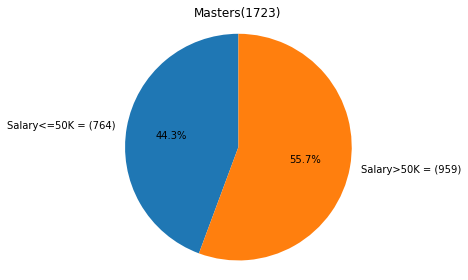

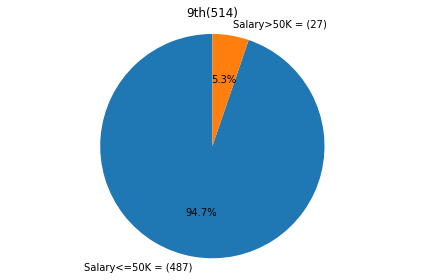

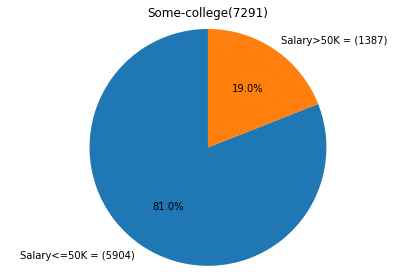

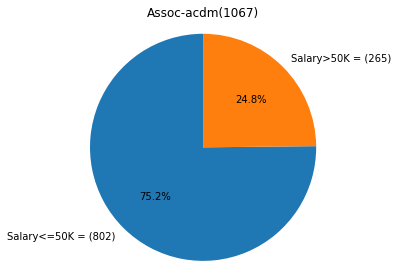

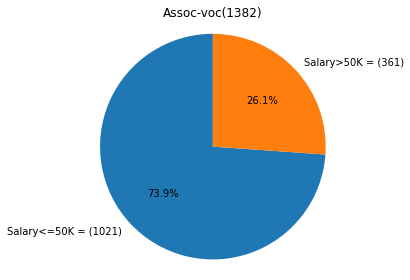

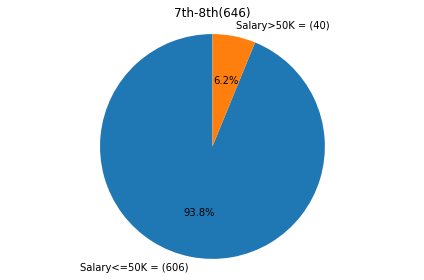

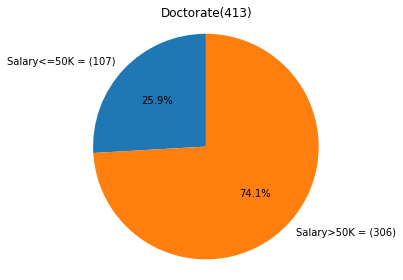

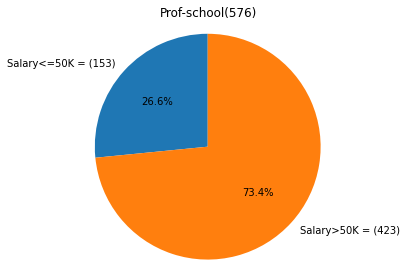

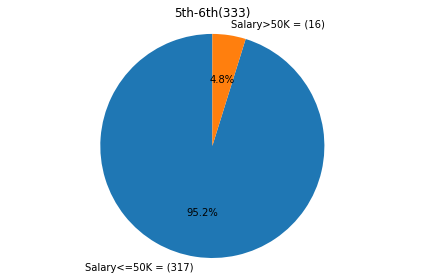

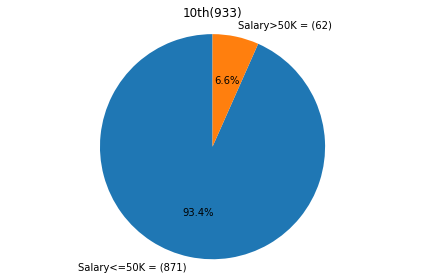

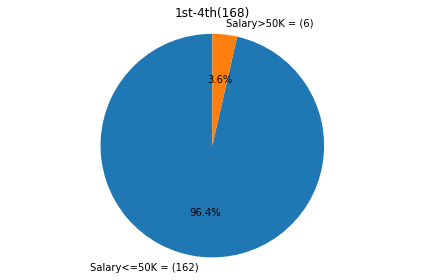

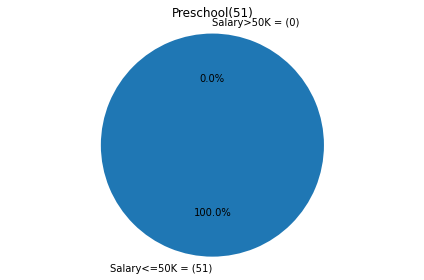

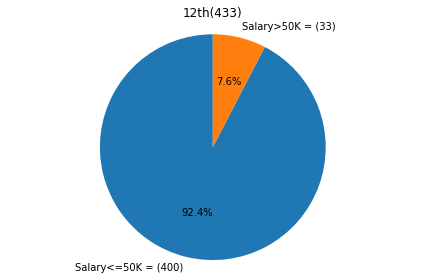

In [601]:
#pie chart for all signs
# print(actualDataFrame[ColumnNames.Education.value])
#print(actualDataFrame.loc[actualDataFrame[ColumnNames.Education.value] == 'Bachelors'])
# print(((actualDataFrame[ColumnNames.Education.value]=='Bachelors')[0:numberOfRows] == True))
#print(actualDataFrame.loc[(actualDataFrame[ColumnNames.Education.value] == 'Bachelors') & (actualDataFrame[ColumnNames.SalaryLessThanFifty.value] == False)])
uniqueEducationValues = actualDataFrame[ColumnNames.Education.value].unique()
pieLabels = ['Salary<=50K', 'Salary>50K']
educationSalaryValues = {}
educationSalaryComplementaryValues = {}

for differentEducationValues in uniqueEducationValues:
    educationSalaryValues.setdefault(differentEducationValues, 0)
    educationSpecificData = actualDataFrame.loc[actualDataFrame[ColumnNames.Education.value] == differentEducationValues]
    individualEducationCountLessThanFiftyK = len(educationSpecificData.loc[educationSpecificData[ColumnNames.SalaryLessThanFifty.value] == True])
    educationSalaryValues[differentEducationValues] = individualEducationCountLessThanFiftyK
    educationSalaryComplementaryValues[differentEducationValues] = len(educationSpecificData)-individualEducationCountLessThanFiftyK
    educationSalaryBothValues = [individualEducationCountLessThanFiftyK, len(educationSpecificData)-individualEducationCountLessThanFiftyK]
    educationSpecificPieLabels = [pieLabel+' = ('+str(eduSalaryValue)+')' for pieLabel,eduSalaryValue in zip(pieLabels, educationSalaryBothValues)]
    fig,ax = plt.subplots()
    
    patches, texts, autotexts = ax.pie(educationSalaryBothValues, labels=educationSpecificPieLabels, autopct='%1.1f%%', startangle=90, shadow=False)
    for text in texts:
        text.set_color('black')
    for autotext in autotexts:
        autotext.set_color('black')
    ax.axis('equal') 
    ax.set_title('{0}({1})'.format(differentEducationValues, reduce(lambda x,y: x+y, educationSalaryBothValues)))
    plt.tight_layout()
    plt.show()

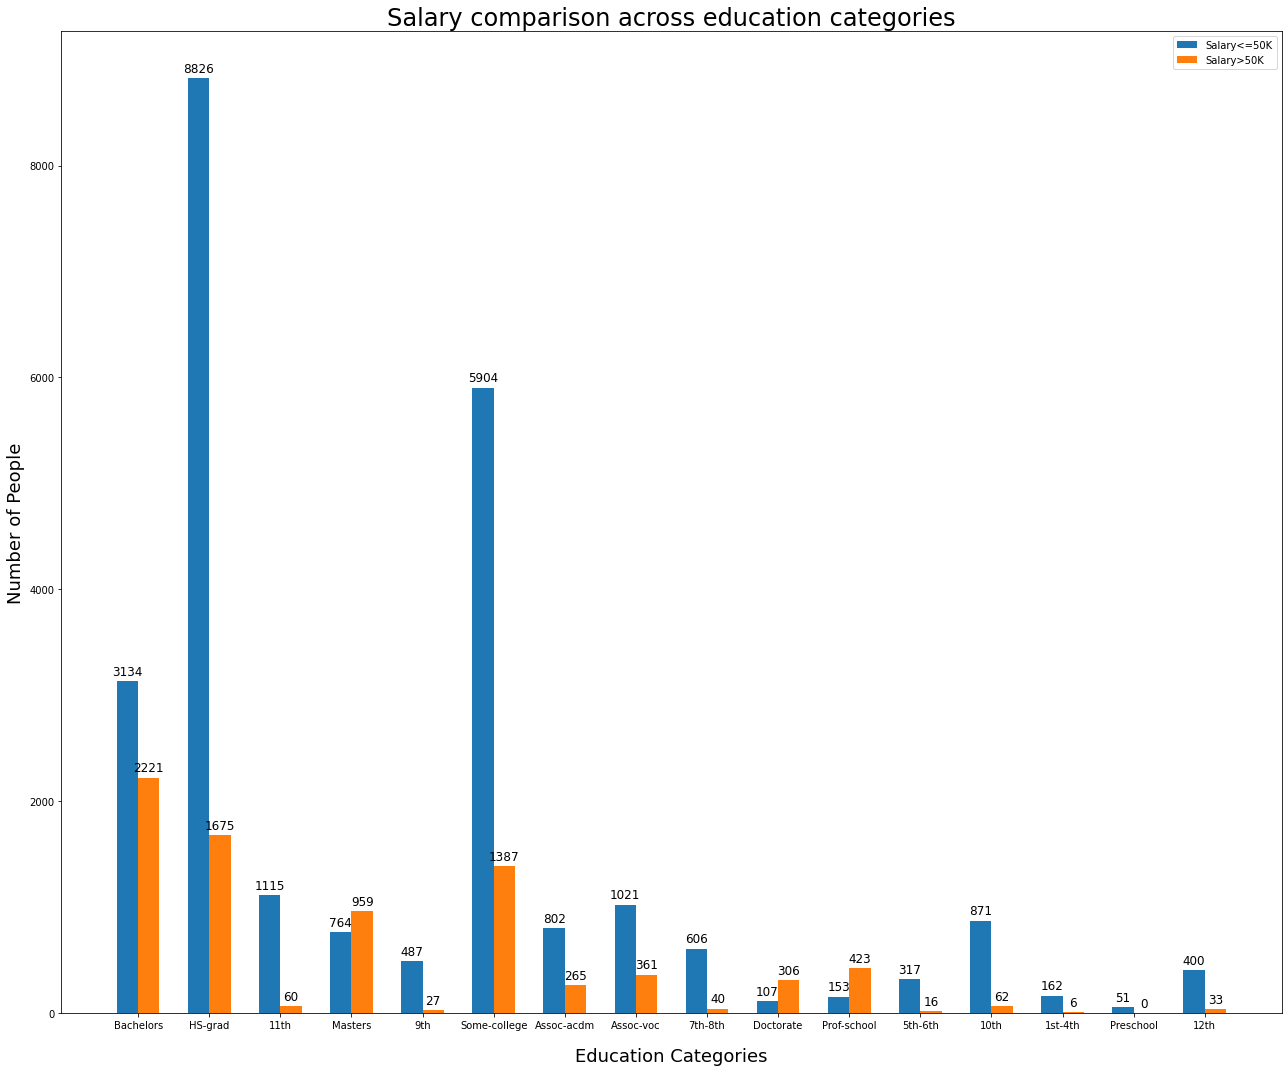

In [602]:
#stacked bar chart for each education category vs (Salary <=50k, Salary>50k)
labels = [x for x in educationSalaryComplementaryValues.keys()]
salLessThanFifty = [x for x in educationSalaryValues.values()]
salMoreThanFifty = [x for x in educationSalaryComplementaryValues.values()]

x = np.arange(len(labels))  # the label locations
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(18, 15))
rects1 = ax.bar(x - width/2, salLessThanFifty, width, label='Salary<=50K')
rects2 = ax.bar(x + width/2, salMoreThanFifty, width, label='Salary>50K')

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Education Categories', fontsize=18, labelpad=17)
ax.set_ylabel('Number of People', fontsize=18)
ax.set_title('Salary comparison across education categories', fontsize=24)
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3, fontsize=12)
ax.bar_label(rects2, padding=3, fontsize=12)

fig.tight_layout()

plt.show()

In [603]:
#creating data for education num category against salary.
uniqueEducationNumValues = actualDataFrame[ColumnNames.EducationNum.value].unique()
educationNumSalaryValues = {}
educationNumSalaryComplementaryValues = {}

for differentEducationNumValues in uniqueEducationNumValues:
    educationNumSalaryValues.setdefault(differentEducationNumValues, 0)
    educationNumSpecificData = actualDataFrame.loc[actualDataFrame[ColumnNames.EducationNum.value] == differentEducationNumValues]
    individualEducationNumCountLessThanFiftyK = len(educationNumSpecificData.loc[educationNumSpecificData[ColumnNames.SalaryLessThanFifty.value] == True])
    educationNumSalaryValues[differentEducationNumValues] = individualEducationNumCountLessThanFiftyK
    educationNumSalaryComplementaryValues[differentEducationNumValues] = len(educationNumSpecificData)-individualEducationNumCountLessThanFiftyK
    educationNumSalaryBothValues = [individualEducationNumCountLessThanFiftyK, len(educationNumSpecificData)-individualEducationNumCountLessThanFiftyK]
    educationNumSpecificPieLabels = [pieLabel+' = ('+str(eduNumSalaryValue)+')' for pieLabel,eduNumSalaryValue in zip(pieLabels, educationNumSalaryBothValues)]
#     in case we want to show the pie charts
#     fig,ax = plt.subplots()
    
#     patches, texts, autotexts = ax.pie(educationNumSalaryBothValues, labels=educationNumSpecificPieLabels, autopct='%1.1f%%', startangle=90, shadow=False)
#     for text in texts:
#         text.set_color('black')
#     for autotext in autotexts:
#         autotext.set_color('black')
#     ax.axis('equal') 
#     ax.set_title('{0}({1})'.format(differentEducationNumValues, reduce(lambda x,y: x+y, educationNumSalaryBothValues)))
#     plt.tight_layout()
#     plt.show()



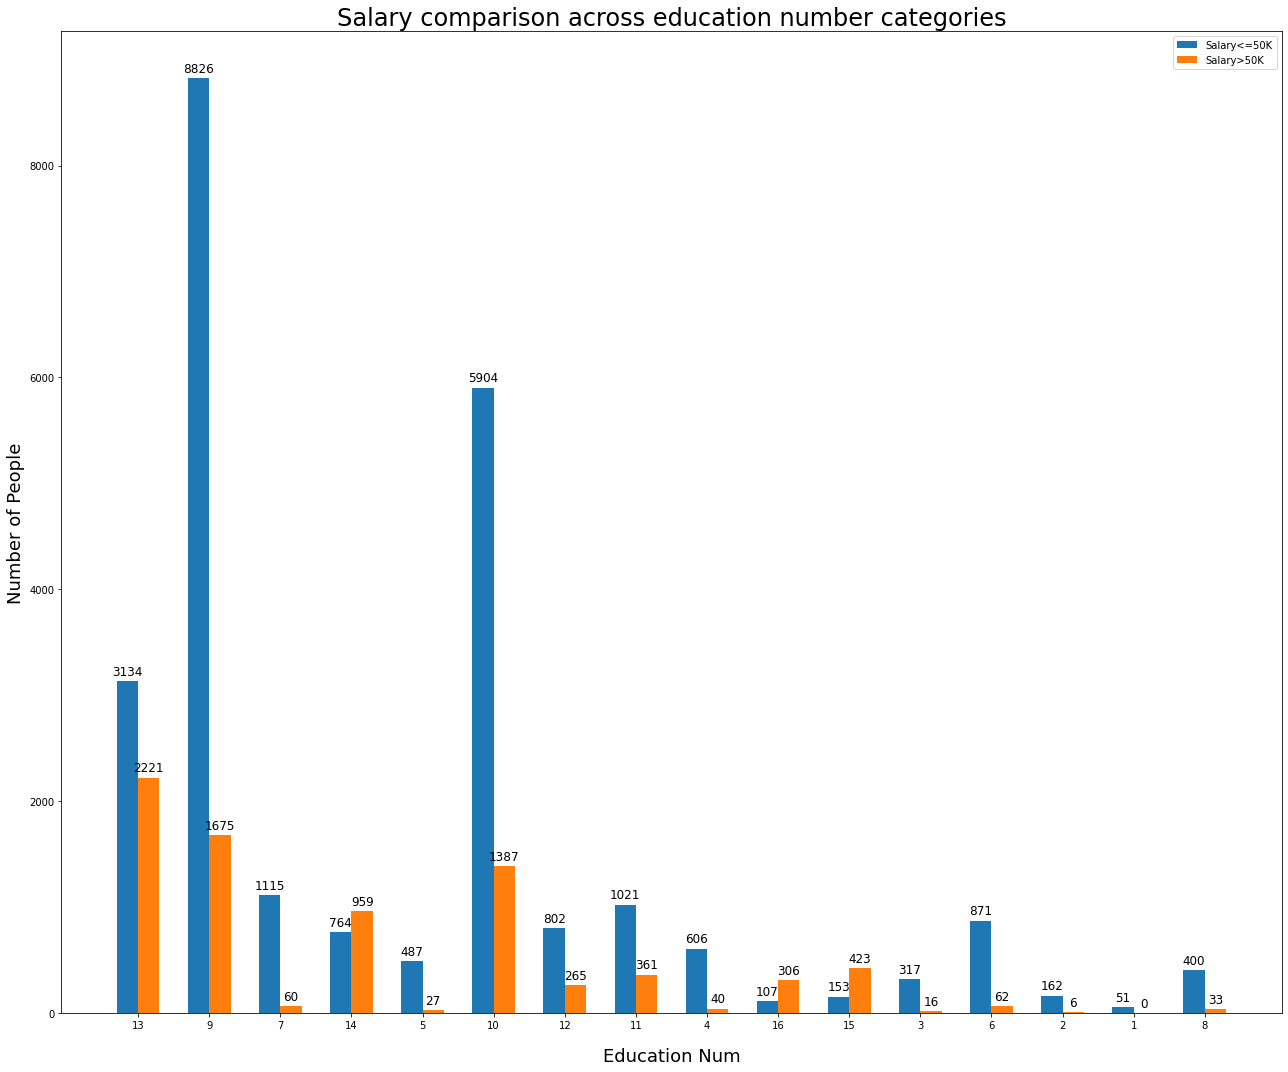

In [604]:
#stacked bar chart for each education category vs (Salary <=50k, Salary>50k)
labels = [x for x in educationNumSalaryComplementaryValues.keys()]
salNumLessThanFifty = [x for x in educationNumSalaryValues.values()]
salNumMoreThanFifty = [x for x in educationNumSalaryComplementaryValues.values()]

x = np.arange(len(labels))  # the label locations
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(18, 15))
rects1 = ax.bar(x - width/2, salNumLessThanFifty, width, label='Salary<=50K')
rects2 = ax.bar(x + width/2, salNumMoreThanFifty, width, label='Salary>50K')

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Education Num', fontsize=18, labelpad=17)
ax.set_ylabel('Number of People', fontsize=18)
ax.set_title('Salary comparison across education number categories', fontsize=24)
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3, fontsize=12)
ax.bar_label(rects2, padding=3, fontsize=12)

fig.tight_layout()

plt.show()

Text(0.5, 1.0, 'Education Category vs Salary More Than Fifty Thousand')

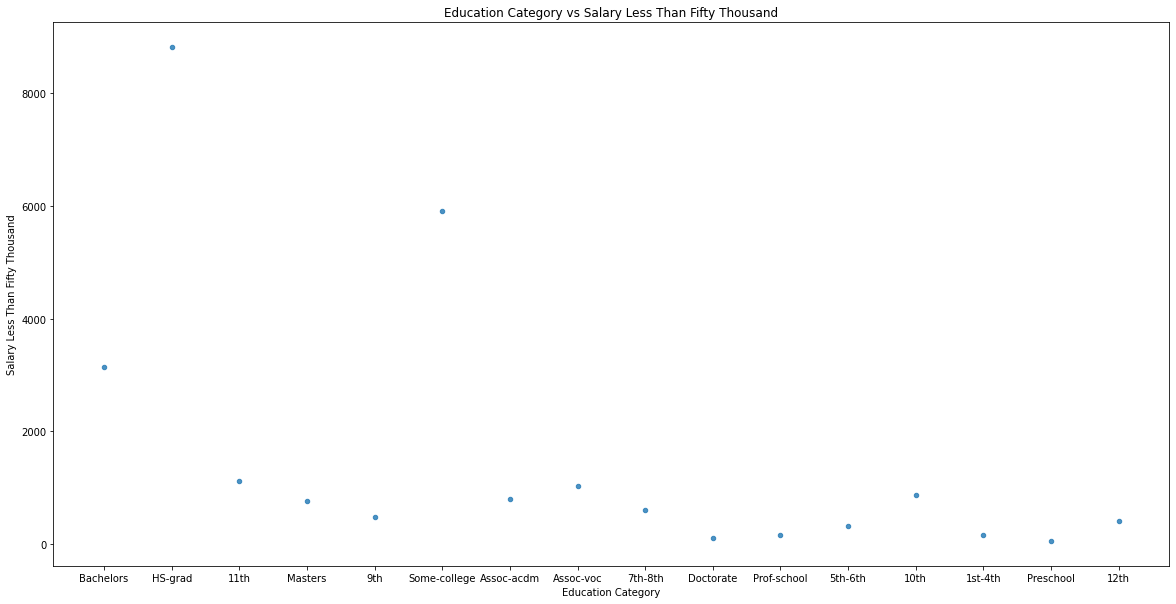

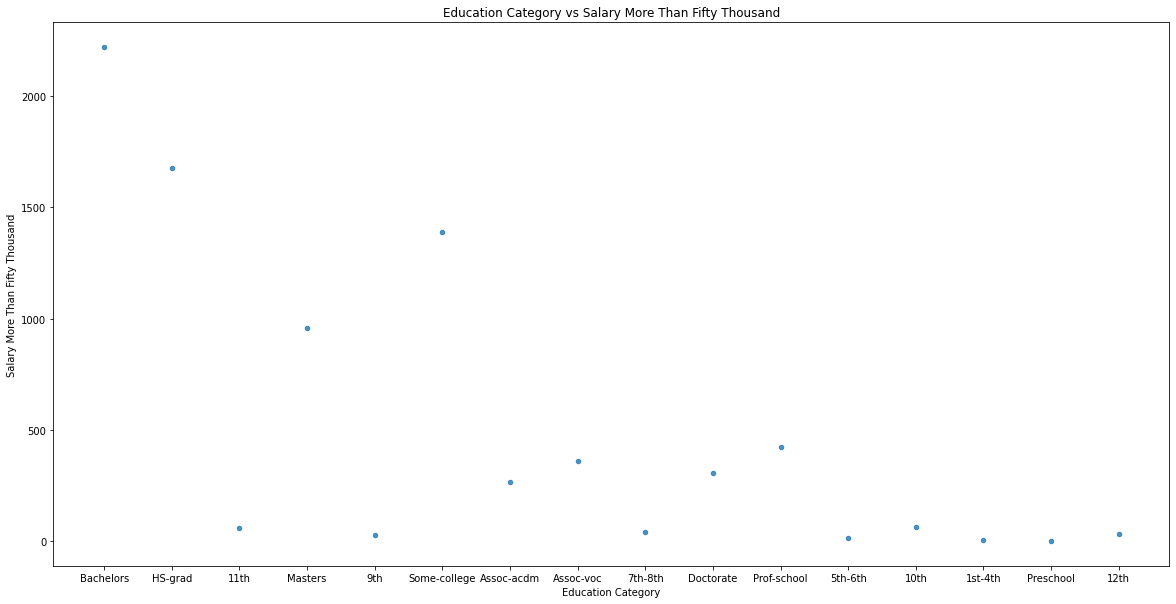

In [605]:
#scatter plot to see if we can derive anything
dataFrame = pd.DataFrame({
    'Education Category': [x for x in educationSalaryComplementaryValues.keys()],
    'Salary Less Than Fifty Thousand': salLessThanFifty,
    'Salary More Than Fifty Thousand': salMoreThanFifty,
})
dy1 = dataFrame.plot.scatter(x='Education Category', y='Salary Less Than Fifty Thousand', alpha=0.8, figsize=(20,10))
dy1.set_title('Education Category vs Salary Less Than Fifty Thousand')
dy2 = dataFrame.plot.scatter(x='Education Category', y='Salary More Than Fifty Thousand', alpha=0.8, figsize=(20,10))
dy2.set_title('Education Category vs Salary More Than Fifty Thousand')

['Bachelors', 13, 'HS-grad', 9, '11th', 7, 'Masters', 14, '9th', 5, 'Some-college', 10, 'Assoc-acdm', 12, 'Assoc-voc', 11, '7th-8th', 4, 'Doctorate', 16, 'Prof-school', 15, '5th-6th', 3, '10th', 6, '1st-4th', 2, 'Preschool', 1, '12th', 8]


<AxesSubplot:>

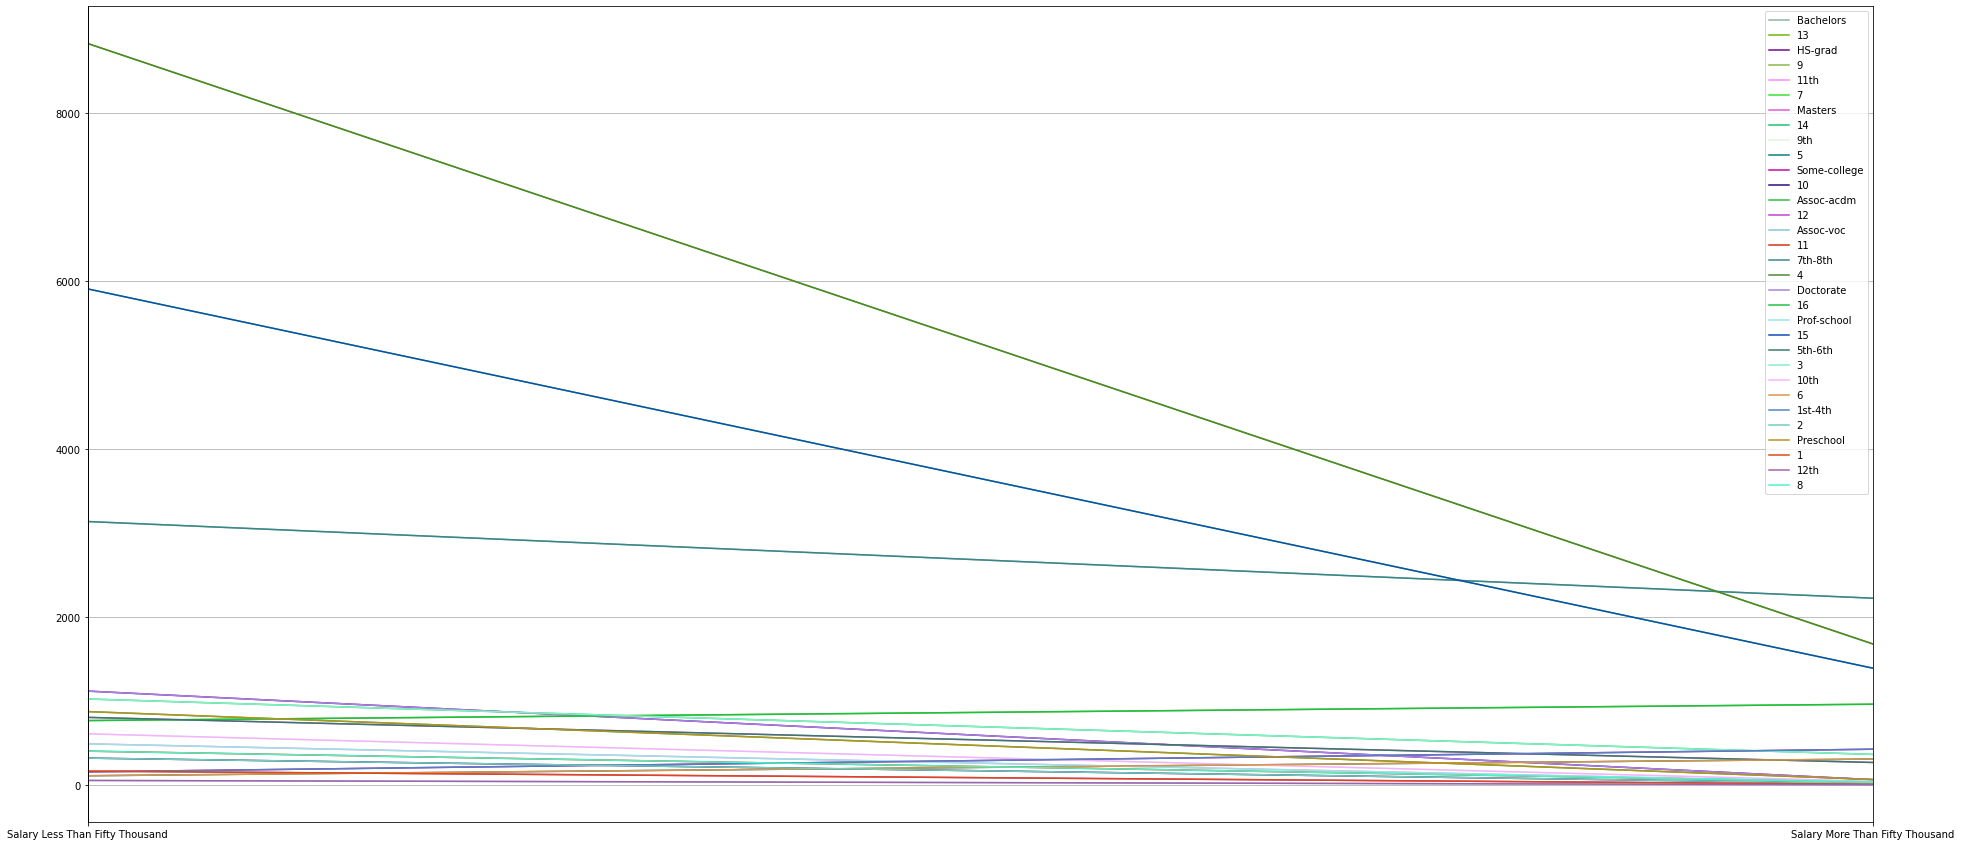

In [606]:
#parallel plot to check the relation between education category and education num
listValues = []
for x,y in zip(educationSalaryComplementaryValues.keys(), educationNumSalaryComplementaryValues.keys()):
    listValues.append(x)
    listValues.append(y)
print(listValues)
combinedDataFrame = pd.DataFrame({
    'Education Category': listValues,
    'Salary Less Than Fifty Thousand': salLessThanFifty+salNumLessThanFifty,
    'Salary More Than Fifty Thousand': salMoreThanFifty+salNumMoreThanFifty,
})
plt.figure(figsize=(32,15))
pd.plotting.parallel_coordinates(combinedDataFrame, 'Education Category')

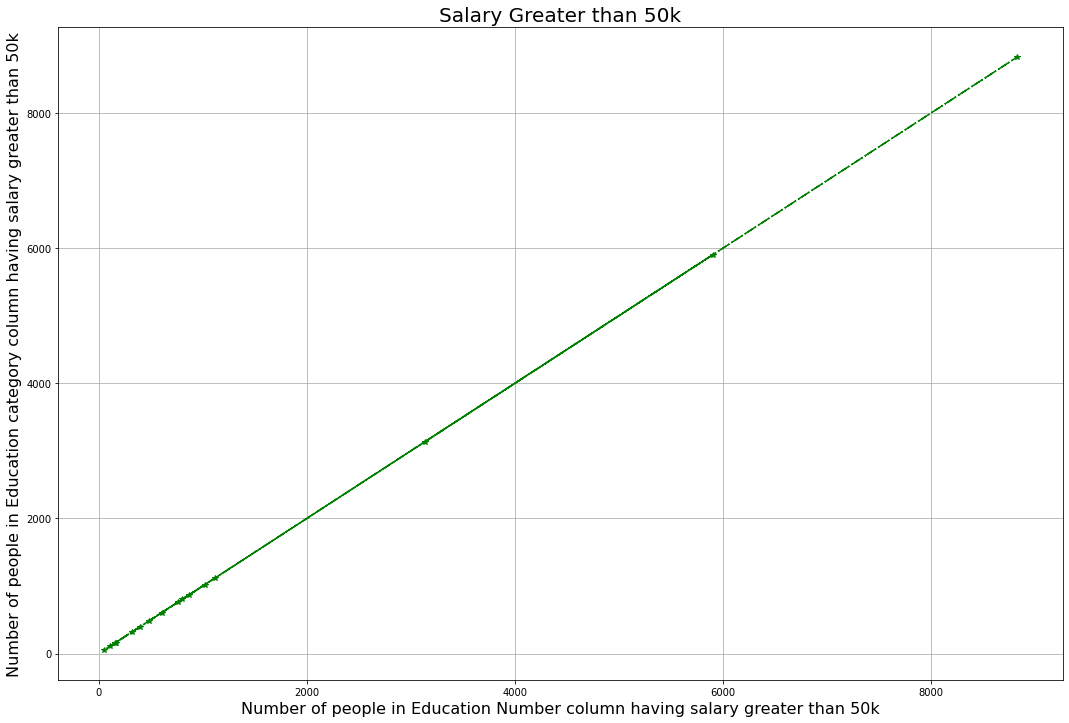

In [607]:
#line chart to say that both education and education num are same. sal greater than 50k
plt.plot(educationNumSalaryValues.values(), educationSalaryValues.values(), linestyle='-.', marker='*', color='g')
plt.title('Salary Greater than 50k', fontsize=20)
plt.xlabel('Number of people in Education Number column having salary greater than 50k', fontsize = 16)
plt.ylabel('Number of people in Education category column having salary greater than 50k', fontsize = 16)
plt.grid(True)

#to show the legend/scale
f = plt.gcf()
fig_width, fig_height = f.get_size_inches()
f.set_figwidth(fig_width*3)
f.set_figheight(fig_height*3)

plt.show()

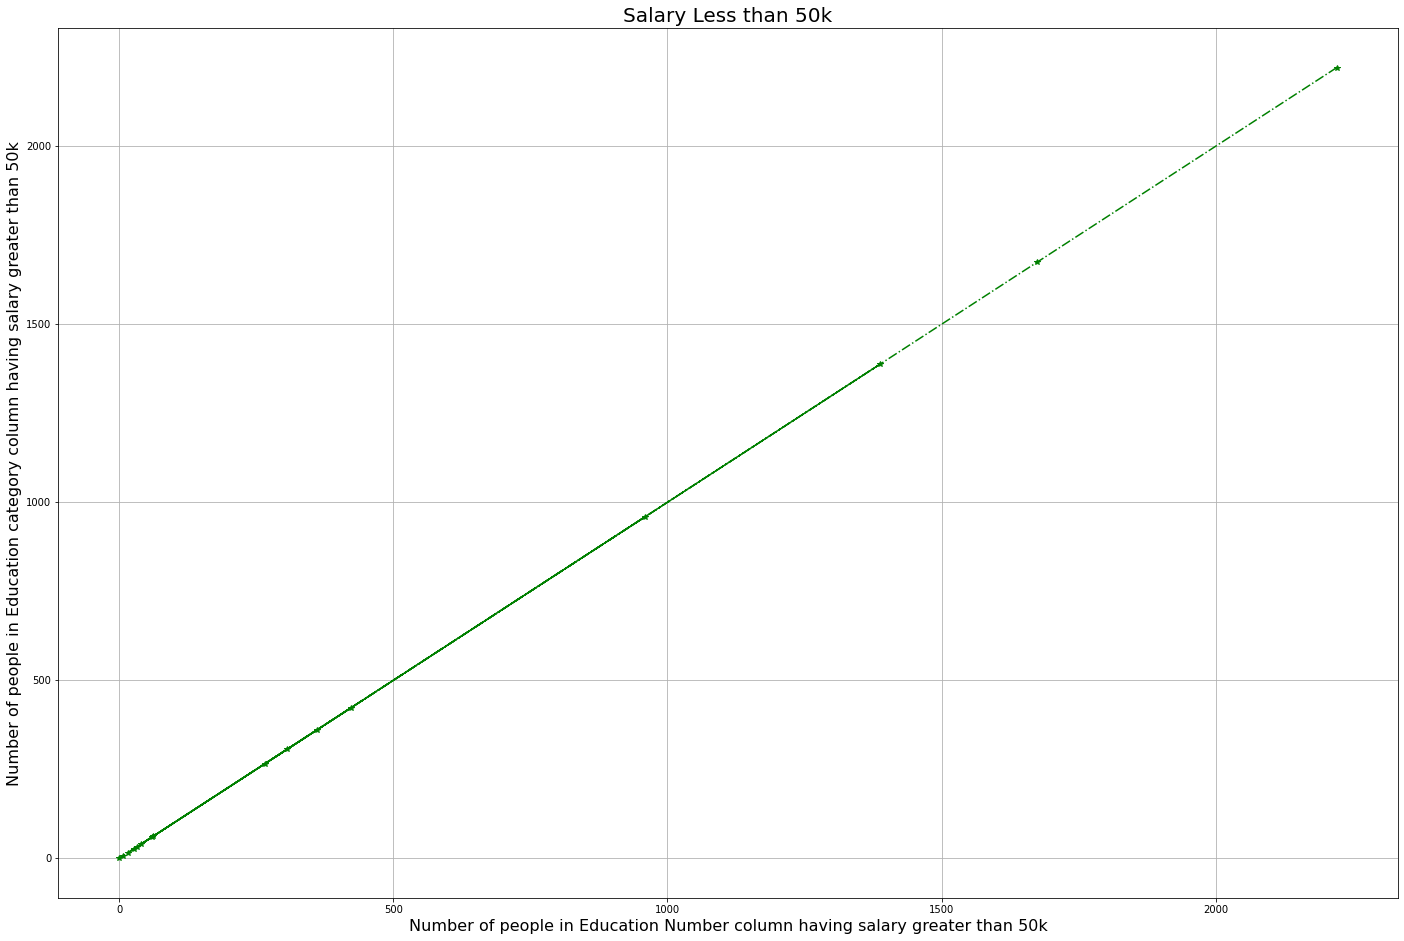

In [608]:
#line chart to say that both education and education num are same. sal less than 50k
plt.plot(educationNumSalaryComplementaryValues.values(), educationSalaryComplementaryValues.values(), linestyle='-.', marker='*', color='g')
plt.title('Salary Less than 50k', fontsize=20)
plt.xlabel('Number of people in Education Number column having salary greater than 50k', fontsize = 16)
plt.ylabel('Number of people in Education category column having salary greater than 50k', fontsize = 16)
plt.grid(True)

#to show the legend/scale
f = plt.gcf()
fig_width, fig_height = f.get_size_inches()
f.set_figwidth(fig_width*4)
f.set_figheight(fig_height*4)

plt.show()

Text(0.5, 1.0, 'Capital Gain vs Salary More Than Fifty Thousand')

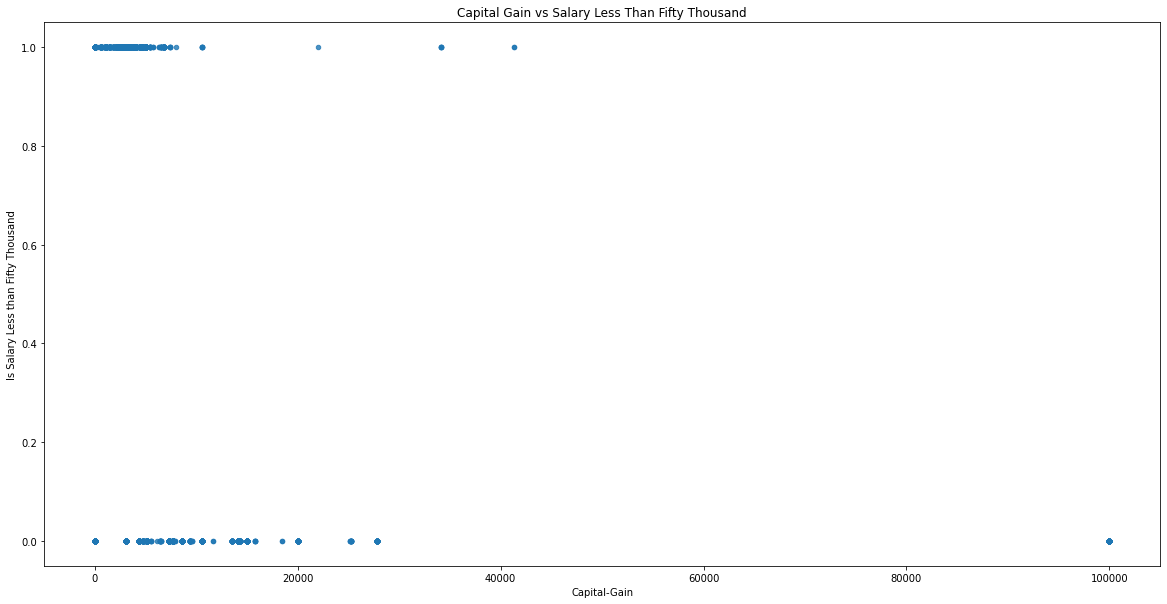

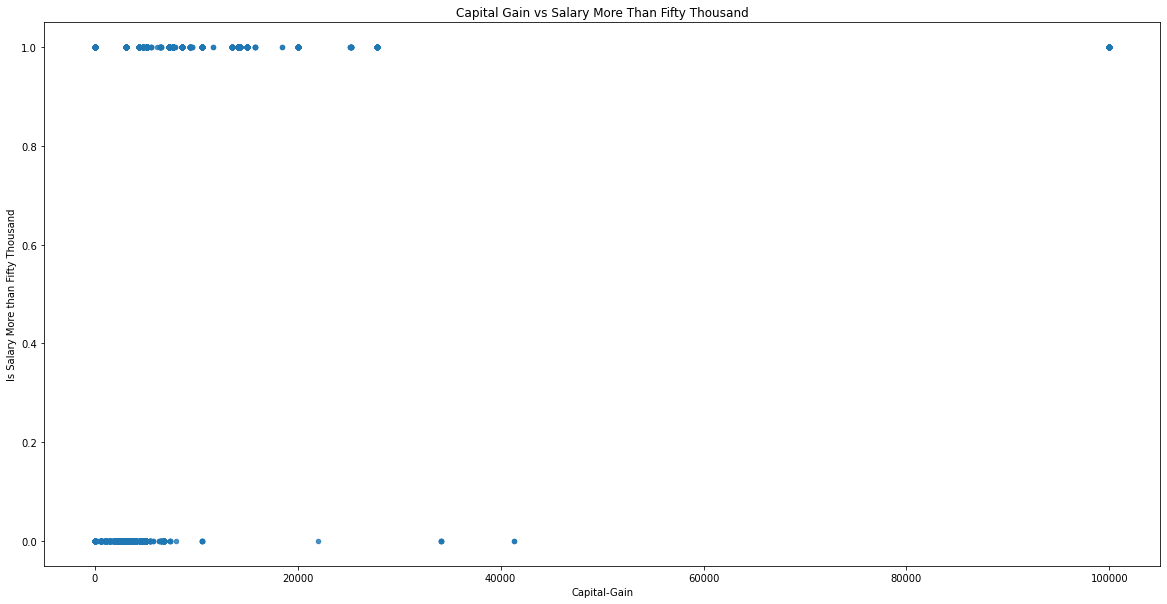

In [609]:
#scatter plot to show that there exists no relationship between capital gain and sal value
dataFrame = pd.DataFrame({
    ColumnNames.CapitalGain.value: list(actualDataFrame[ColumnNames.CapitalGain.value]),
    ColumnNames.SalaryLessThanFifty.value: [1 if booleanValue==True else 0 for booleanValue in actualDataFrame[ColumnNames.SalaryLessThanFifty.value]],
    ColumnNames.SalaryMoreThanFifty.value: [1 if booleanValue==True else 0 for booleanValue in actualDataFrame[ColumnNames.SalaryMoreThanFifty.value]],
})

dy1 = dataFrame.plot.scatter(x=ColumnNames.CapitalGain.value, y=ColumnNames.SalaryLessThanFifty.value, alpha=0.8, figsize=(20,10))
dy1.set_title('Capital Gain vs Salary Less Than Fifty Thousand')
dy2 = dataFrame.plot.scatter(x=ColumnNames.CapitalGain.value, y=ColumnNames.SalaryMoreThanFifty.value, alpha=0.8, figsize=(20,10))
dy2.set_title('Capital Gain vs Salary More Than Fifty Thousand')


Text(0.5, 1.0, 'Capital Gain vs Salary More Than Fifty Thousand')

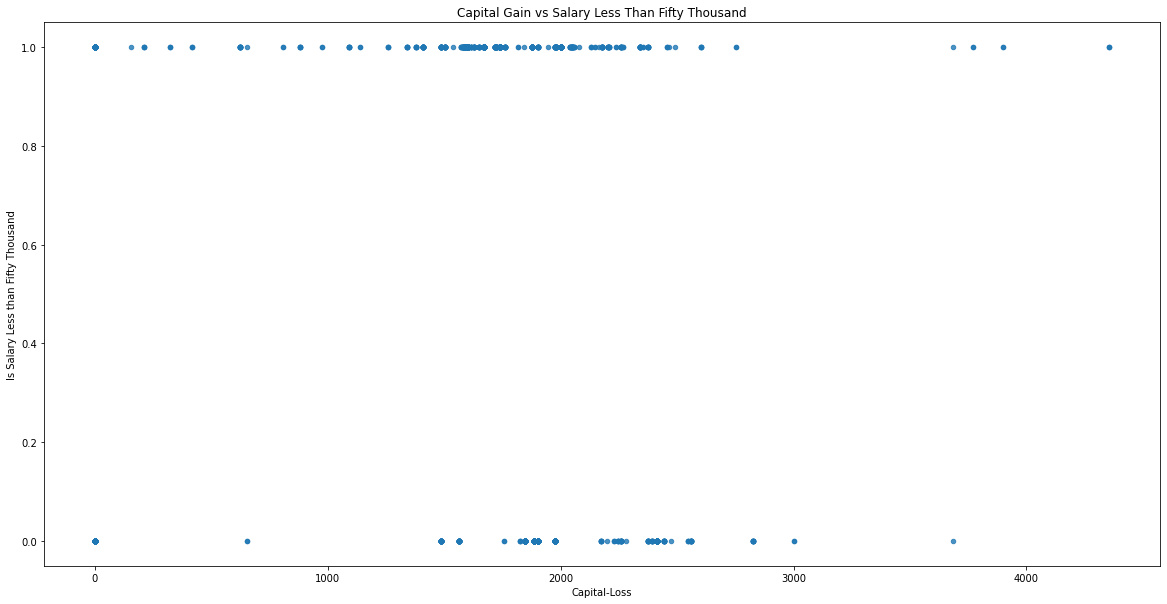

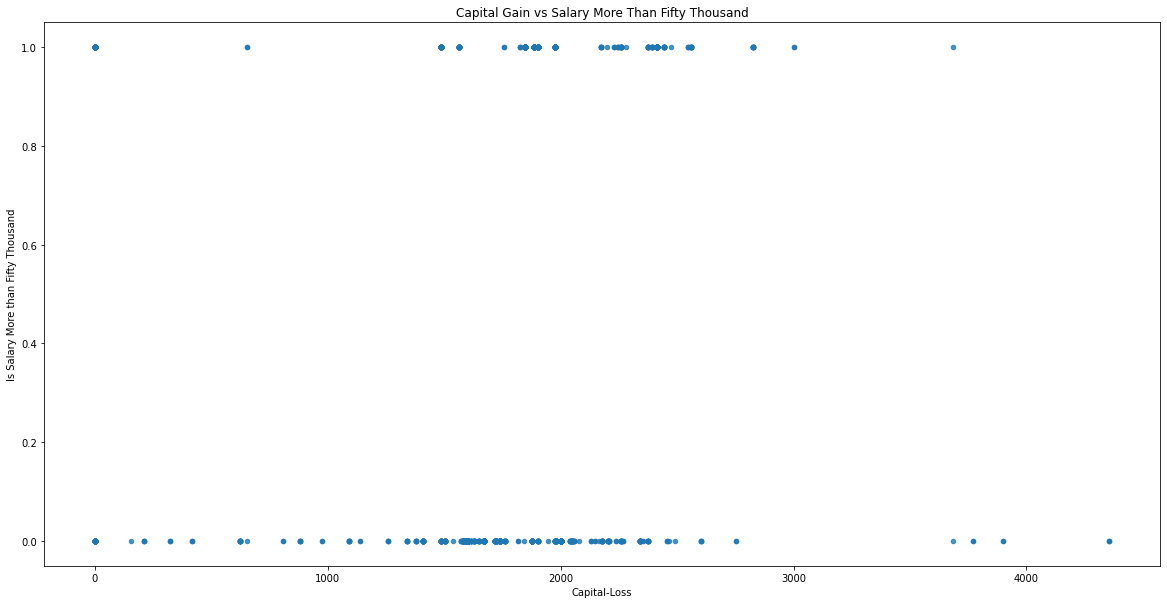

In [610]:
#scatter plot to show that there exists no relationship between capital gain and sal value
dataFrame = pd.DataFrame({
    ColumnNames.CapitalLoss.value: list(actualDataFrame[ColumnNames.CapitalLoss.value]),
    ColumnNames.SalaryLessThanFifty.value: [1 if booleanValue==True else 0 for booleanValue in actualDataFrame[ColumnNames.SalaryLessThanFifty.value]],
    ColumnNames.SalaryMoreThanFifty.value: [1 if booleanValue==True else 0 for booleanValue in actualDataFrame[ColumnNames.SalaryMoreThanFifty.value]],
})

dy1 = dataFrame.plot.scatter(x=ColumnNames.CapitalLoss.value, y=ColumnNames.SalaryLessThanFifty.value, alpha=0.8, figsize=(20,10))
dy1.set_title('Capital Gain vs Salary Less Than Fifty Thousand')
dy2 = dataFrame.plot.scatter(x=ColumnNames.CapitalLoss.value, y=ColumnNames.SalaryMoreThanFifty.value, alpha=0.8, figsize=(20,10))
dy2.set_title('Capital Gain vs Salary More Than Fifty Thousand')

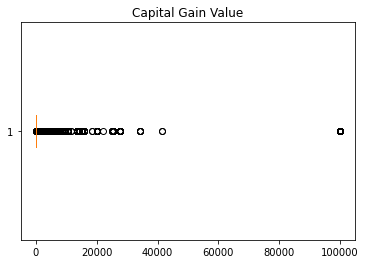

In [611]:
# Box plot to indicate the skewness/degree of dispersion in Capital Gain data
plt.boxplot(x=actualDataFrame[ColumnNames.CapitalGain.value],vert=False)
plt.title('Capital Gain Value')
plt.show()

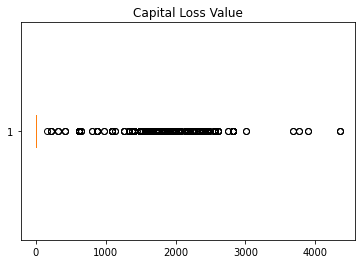

In [612]:
# Box plot to indicate the skewness/degree of dispersion in Capital Loss data
plt.boxplot(x=actualDataFrame[ColumnNames.CapitalLoss.value],vert=False)
plt.title('Capital Loss Value')
plt.show()